In [624]:
import pandas as pd
import geopandas as gpd
import numpy as np
import json
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString, Polygon
import pickle

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Road network data of Seattle city
roads = gpd.read_file('https://opendata.arcgis.com/datasets/383027d103f042499693da22d72d10e3_0.geojson')

In [3]:
# Traffic volume data Seattle city road segments in 2016

volume = gpd.read_file('https://opendata.arcgis.com/datasets/170b764c52f34c9497720c0463f3b58b_9.geojson')

In [4]:
volume.rename(columns={'OBJECTID': 'SEGID'},inplace=True)

In [5]:
acc = pd.read_pickle('data/accident.pickle')

Text(0.5, 1.0, 'Seattle Road Network')

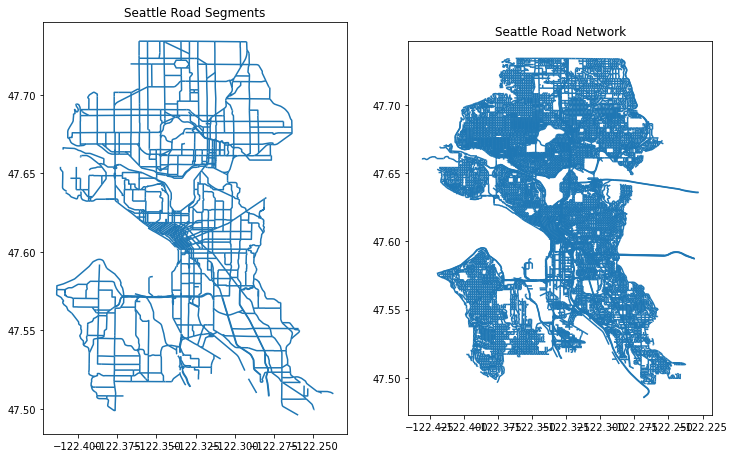

In [6]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (12, 12))
volume.plot(ax = ax1)
ax1.set_title('Seattle Road Segments')
roads.plot(ax = ax2)
ax2.set_title('Seattle Road Network')

Text(0.5, 1.0, 'Accident map in 2016 Seattle')

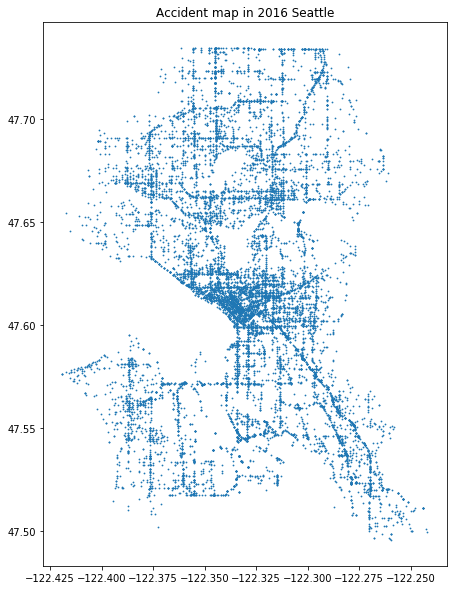

In [7]:
acc[acc['year']==2016].plot(markersize= 0.6, figsize = (12, 10))
plt.title('Accident map in 2016 Seattle')

In [8]:
roads.columns

Index(['OBJECTID', 'ARTCLASS', 'COMPKEY', 'UNITIDSORT', 'UNITDESC',
       'STNAME_ORD', 'XSTRLO', 'XSTRHI', 'ARTDESCRIPT', 'OWNER', 'STATUS',
       'BLOCKNBR', 'SPEEDLIMIT', 'SEGDIR', 'ONEWAY', 'ONEWAYDIR', 'FLOW',
       'SEGLENGTH', 'SURFACEWIDTH', 'SURFACETYPE_1', 'SURFACETYPE_2', 'INTRLO',
       'DIRLO', 'INTKEYLO', 'INTRHI', 'DIRHI', 'NATIONHWYSYS', 'STREETTYPE',
       'PVMTCONDINDX1', 'PVMTCONDINDX2', 'TRANCLASS', 'TRANDESCRIPT',
       'SLOPE_PCT', 'PVMTCATEGORY', 'PARKBOULEVARD', 'SHAPE_Length',
       'geometry'],
      dtype='object')

In [9]:
volume.columns


Index(['SEGID', 'COUNT_COMPKEY', 'FIRST_STNAME_ORD', 'FIRST_ARTDESCRIPT',
       'FIRST_TRANDESCRIPT', 'COUNTFLAG', 'FLOWSEGID', 'DOWNTOWN',
       'COUNTSTART', 'COUNTAADT', 'COUNTAAWDT', 'ESTIMATE', 'AWDT_ROUND',
       'SHAPE_Length', 'geometry'],
      dtype='object')

In [13]:
# nearest road blocks to each road segment

'''
dist = []
for segment in volume.geometry:
    d = []
    for block in roads.geometry:
        d.append(segment.distance(block))
    d = np.array(d)
    dist.append(d.argmin())
    
'''

'\ndist = []\nfor segment in volume.geometry:\n    d = []\n    for block in roads.geometry:\n        d.append(segment.distance(block))\n    d = np.array(d)\n    dist.append(d.argmin())\n    \n'

In [10]:
# saving minimum distances to a csv file
# np.savetxt('segment_net.csv', dist, fmt="%d", delimiter=",")

In [12]:
# need to come up with a better solutin to assign each road segment to the road network map

""""
dist = []
for idx, segment in enumerate(volume.geometry):
    d = []
    for i, block in enumerate(roads.geometry[:10]):
        d.append(segment.distance(block))
    d = np.array(d)
    for j in d.argsort()[:5]:
        if volume.iloc[j]['FIRST_STNAME_ORD'] == roads.iloc[j]['STNAME_ORD']:
            dist.append(j)
"""

'"\ndist = []\nfor idx, segment in enumerate(volume.geometry):\n    d = []\n    for i, block in enumerate(roads.geometry[:10]):\n        d.append(segment.distance(block))\n    d = np.array(d)\n    for j in d.argsort()[:5]:\n        if volume.iloc[j][\'FIRST_STNAME_ORD\'] == roads.iloc[j][\'STNAME_ORD\']:\n            dist.append(j)\n'

In [35]:
# creating "SEGID" column in network

dist = pd.read_csv('segment_net_indices.csv', header = None).values

network = roads.iloc[dist.flatten()]
network.loc[:, 'SEGID'] = volume['SEGID'].values


In [38]:
network.shape


(1865, 38)

In [113]:
network

,OBJECTID,ARTCLASS,COMPKEY,UNITIDSORT,UNITDESC,STNAME_ORD,XSTRLO,XSTRHI,ARTDESCRIPT,OWNER,...,PVMTCONDINDX1,PVMTCONDINDX2,TRANCLASS,TRANDESCRIPT,SLOPE_PCT,PVMTCATEGORY,PARKBOULEVARD,SHAPE_Length,geometry,SEGID
1923,1924,2.0,21309,169700001,S SPOKANE NR ST BETWEEN S SPOKANE ST RP AND EA...,S SPOKANE ST,S SPOKANE ST RP,EAST MARGINAL WAY S,Minor Arterial,,...,91.0,0.0,2,MAJOR TRANSIT ROUTE,0.0,ART,N,927.672370,LINESTRING (-122.3434333838131 47.571579040261...,1
3408,3409,1.0,8766,050650220,ALASKAN WY VI NB BETWEEN EAST MARGINAL WAY S A...,SR99 NB,EAST MARGINAL WAY S,ALASKAN WY VI NB ON RP,Principal Arterial,WSDOT,...,0.0,0.0,2,MAJOR TRANSIT ROUTE,0.0,ART,N,1605.935350,LINESTRING (-122.3394359392448 47.566345148158...,2
3403,3404,3.0,8715,050710010,ALASKAN WY VI SB WSB WB OFF RP BETWEEN ALASKAN...,SR99 SB OFF RP,ALASKAN WY VI SB,WEST SEATTLE BR WB,Collector Arterial,WSDOT,...,100.0,0.0,0,NOT DESIGNATED,0.0,ART,N,1319.086025,LINESTRING (-122.3393934889239 47.573037386120...,3
1923,1924,2.0,21309,169700001,S SPOKANE NR ST BETWEEN S SPOKANE ST RP AND EA...,S SPOKANE ST,S SPOKANE ST RP,EAST MARGINAL WAY S,Minor Arterial,,...,91.0,0.0,2,MAJOR TRANSIT ROUTE,0.0,ART,N,927.672370,LINESTRING (-122.3434333838131 47.571579040261...,4
1922,1923,2.0,21305,169570050,S SPOKANE CR ST BETWEEN S SPOKANE NR ST AND 6T...,S SPOKANE CR ST,S SPOKANE NR ST,6TH AVE S,Minor Arterial,,...,98.0,0.0,2,MAJOR TRANSIT ROUTE,0.0,ART,N,199.159007,LINESTRING (-122.3267633109531 47.571695311514...,5
8051,8052,2.0,21332,169750060,S SPOKANE SR ST BETWEEN 6TH AVE S AND 6TH AV S...,S SPOKANE ST,6TH AVE S,6TH AV S - I5 NB RP,Minor Arterial,,...,92.0,0.0,2,MAJOR TRANSIT ROUTE,1.0,ART,N,218.580714,LINESTRING (-122.32598557265 47.57140800583161...,6
3057,3058,1.0,6247,031500380,4TH AVE S BETWEEN S SPOKANE SR ST AND W SEA BR...,4TH AVE S,S SPOKANE SR ST,W SEA BR EB 4 AV OFF RP,Principal Arterial,,...,68.0,0.0,2,MAJOR TRANSIT ROUTE,0.0,ART,N,646.438688,LINESTRING (-122.3290774971118 47.571420865588...,7
17150,17151,1.0,12052,089550900,OLSON PL SW BETWEEN 1ST AVE S AND 2ND AVE SW,OLSON PL SW,1ST AVE S,2ND AVE SW,Principal Arterial,,...,46.0,98.0,2,MAJOR TRANSIT ROUTE,10.0,ART,N,533.723387,LINESTRING (-122.3348413539571 47.522322332966...,8
13565,13566,1.0,19645,155900020,S CLOVERDALE ST BETWEEN CLOVERDALE ST OFF RP A...,S CLOVERDALE ST,CLOVERDALE ST OFF RP,5TH AVE S,Principal Arterial,,...,58.0,0.0,3,MINOR TRANSIT ROUTE,3.0,ART,N,987.546401,LINESTRING (-122.3320947861128 47.526947558412...,9
1739,1740,1.0,19647,155900070,S CLOVERDALE ST BETWEEN 7TH AVE S AND CLOVERDA...,S CLOVERDALE ST,7TH AVE S,CLOVERDALE ST E ON RP,Principal Arterial,,...,98.0,0.0,3,MINOR TRANSIT ROUTE,0.0,ART,N,447.779560,LINESTRING (-122.3255870656337 47.526473263771...,10


In [780]:
y16 = acc[acc['year']==2016]

In [198]:
# total traffic volume by road segment for 2016 
count16 = y16.groupby('SEGID')['AWDT_ROUND'].count().to_frame(name = 'count')


In [192]:
volume.drop('count', inplace=True, axis = 1)

In [195]:
volume = volume.merge(count16, on = 'SEGID')
volume.head()

,SEGID,COUNT_COMPKEY,FIRST_STNAME_ORD,FIRST_ARTDESCRIPT,FIRST_TRANDESCRIPT,COUNTFLAG,FLOWSEGID,DOWNTOWN,COUNTSTART,COUNTAADT,COUNTAAWDT,ESTIMATE,AWDT_ROUND,SHAPE_Length,geometry,rate,count
0,1,None,S SPOKANE ST,None,None,Y,2019.0,N,2015-04-03T00:00:00,5508.833000,6829.504000,None,6800.0,1118.471355,LINESTRING (-122.3396800681195 47.571700326672...,2.820306e-06,7
1,3,None,ALASKAN WY VI SB,None,None,Y,2024.0,N,2015-06-09T00:00:00,0.000000,23393.664000,None,23400.0,2441.189454,LINESTRING (-122.3394359390524 47.566345148425...,3.512469e-07,3
2,5,None,WEST SEATTLE BR WB,None,None,Y,2026.0,N,2014-04-29T00:00:00,46875.085335,50036.029406,None,50000.0,1817.352489,LINESTRING (-122.333137393517 47.5715774100566...,2.191781e-07,4
3,6,None,WEST SEATTLE BR EB,None,None,Y,2027.0,N,None,NaN,35000.000000,Y,35000.0,1423.838986,LINESTRING (-122.3309157221583 47.571518426658...,7.827789e-08,1
4,7,None,W SEA BR EB 4 AV OFF RP,None,None,Y,2028.0,N,None,NaN,24000.000000,Y,24000.0,1458.971527,LINESTRING (-122.3309157221583 47.571518426658...,2.283105e-07,2


In [200]:
volume['rate'] = volume['count']/(volume['AWDT_ROUND']*365)
volume.shape

(1534, 17)

In [231]:
# final dataframe 
final = volume[['DOWNTOWN','SEGID', 'FIRST_STNAME_ORD', 'AWDT_ROUND','geometry','rate']].merge(network, how = 'left', on = 'SEGID')


In [232]:
final.columns

Index(['DOWNTOWN', 'SEGID', 'FIRST_STNAME_ORD', 'AWDT_ROUND', 'geometry_x',
       'rate', 'OBJECTID', 'ARTCLASS', 'COMPKEY', 'UNITIDSORT', 'UNITDESC',
       'STNAME_ORD', 'XSTRLO', 'XSTRHI', 'ARTDESCRIPT', 'OWNER', 'STATUS',
       'BLOCKNBR', 'SPEEDLIMIT', 'SEGDIR', 'ONEWAY', 'ONEWAYDIR', 'FLOW',
       'SEGLENGTH', 'SURFACEWIDTH', 'SURFACETYPE_1', 'SURFACETYPE_2', 'INTRLO',
       'DIRLO', 'INTKEYLO', 'INTRHI', 'DIRHI', 'NATIONHWYSYS', 'STREETTYPE',
       'PVMTCONDINDX1', 'PVMTCONDINDX2', 'TRANCLASS', 'TRANDESCRIPT',
       'SLOPE_PCT', 'PVMTCATEGORY', 'PARKBOULEVARD', 'SHAPE_Length',
       'geometry_y'],
      dtype='object')

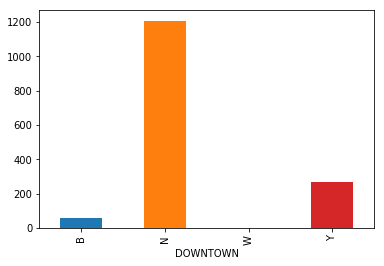

In [233]:
final.groupby(final['DOWNTOWN']).DOWNTOWN.count().plot(kind = 'bar')


In [235]:
final.STREETTYPE.unique()

array(['Industrial Access', None, 'Urban Center Connector',
       'Urban Village Main', 'Neighborhood Corridor',
       'Urban Village Neighborhood Access', 'Urban Village Neighborhood',
       'Neighborhood Yield Street', 'Minor Industrial Access', 'Downtown',
       'Downtown Neighborhood', 'Downtown Neighborhood Access', 'Alley'],
      dtype=object)

In [236]:
def downtown(df_in):
    downtown = set(['Downtown', 'Downtown Neighborhood', 'Downtown Neighborhood Access'])
    
    new_df = df_in.copy()
    new_df['downtown'] = df_in['STREETTYPE'].apply(lambda x: 1 if x in downtown else 0)
    #new_df.drop('acct_type', axis=1, inplace=True)
    return new_df

In [237]:
new_final = downtown(final)

In [277]:
#new_final.ONEWAY = new_final.ONEWAY.astype(int)

new_final['ONEWAY'] = new_final['ONEWAY'].apply(lambda x: 1 if x == 'Y' else 0)

In [280]:
final_train = new_final.iloc[:1323,:]


In [958]:
reg = final_train[['SPEEDLIMIT', 'SURFACEWIDTH', 'rate', 'SLOPE_PCT', 'downtown', 'ONEWAY']]
reg.dropna(how = 'all', inplace = True)


/Users/gulomjon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [959]:
reg.loc[:, 'SLOPE_PCT'] = reg['SLOPE_PCT'].fillna(reg['SLOPE_PCT'].mean())

/Users/gulomjon/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2b0836d8>,
      dtype=object)

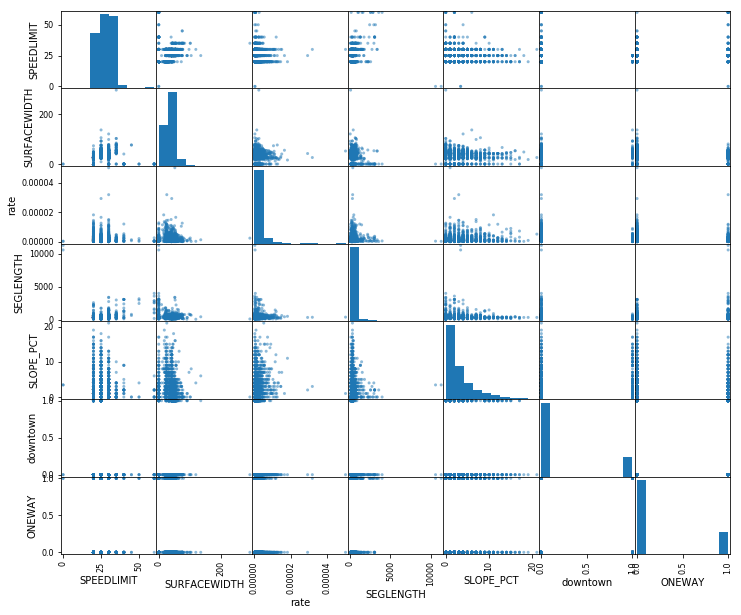

In [284]:
pd.plotting.scatter_matrix(reg, figsize= (12, 10))

In [960]:
reg.corr()

,SPEEDLIMIT,SURFACEWIDTH,rate,SLOPE_PCT,downtown,ONEWAY
SPEEDLIMIT,1.000000,0.131498,-0.079595,-0.135934,-0.156057,0.095594
SURFACEWIDTH,0.131498,1.000000,-0.076208,-0.130434,0.170500,-0.052767
rate,-0.079595,-0.076208,1.000000,0.030277,-0.147456,-0.111447
SLOPE_PCT,-0.135934,-0.130434,0.030277,1.000000,0.073641,0.032549
downtown,-0.156057,0.170500,-0.147456,0.073641,1.000000,0.443205
ONEWAY,0.095594,-0.052767,-0.111447,0.032549,0.443205,1.000000


In [961]:
X.head()

,SPEEDLIMIT,SURFACEWIDTH,SLOPE_PCT,downtown,ONEWAY
0,30.0,20.0,0.0,0,1
1,30.0,33.0,0.0,0,1
2,30.0,25.0,0.0,0,1
3,30.0,55.0,1.0,0,1
4,35.0,77.0,0.0,0,0


In [962]:
y.head()

0    0.282031
1    0.035125
2    0.021918
3    0.007828
4    0.022831
Name: rate, dtype: float64

In [937]:
X = reg[['SPEEDLIMIT', 'SURFACEWIDTH', 'SLOPE_PCT', 'downtown', 'ONEWAY']]
y = reg['rate'].fillna(reg['rate'].mean())*10**5

In [938]:
y

0       0.282031
1       0.035125
2       0.021918
3       0.007828
4       0.022831
5       0.043259
6       0.063224
7       0.199253
8       0.112284
9       0.097847
10      0.966962
11      0.028839
12      0.010744
13      0.119119
14      0.182648
15      0.821918
16      1.081471
17      0.109589
18      0.017123
19      0.060883
20      0.010959
21      0.086251
22      0.103921
23      0.019431
24      0.038052
25      0.182648
26      0.060883
27      0.015960
28      0.095572
29      0.115911
          ...   
1293    0.034247
1294    0.156556
1295    0.103665
1296    0.141169
1297    0.273973
1298    0.215264
1299    0.054795
1300    0.130463
1301    0.391389
1302    0.018265
1303    0.510156
1304    0.080580
1305    0.547945
1306    0.913242
1307    0.421496
1308    0.091324
1309    0.075122
1310    0.456621
1311    0.292237
1312    0.161160
1313    0.403395
1314    1.116185
1315    0.664176
1316    0.182648
1317    1.091436
1318    0.295229
1319    0.224159
1320    0.0382

In [577]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [578]:
linreg = LinearRegression().fit(X_train, y_train)

In [579]:
linreg.score(X_train, y_train)

0.027655337105783495

In [580]:
linreg.score(X_test, y_test)

0.04151108431117623

In [581]:
r2_score(y_test, linreg.predict(X_test))

0.04151108431117623

In [582]:
mean_squared_error(y_train, linreg.predict(X_train) )

0.07640636423949723

In [583]:
mean_squared_error(y_test, linreg.predict(X_test))

0.09004976548192353

In [584]:
# Run the regression on the mean
y_ran = np.ones(1323)*y.mean()*10**6

In [585]:
X_ran_tr, X_ran_test, y_ran_tr, y_ran_test = train_test_split(X, y_ran, test_size=0.33, random_state=42)

In [586]:
rand_reg = LinearRegression().fit(X_ran_tr, y_ran_tr)

In [587]:
rand_reg.score(X_ran_tr, y_ran_tr)

0.0

In [588]:
rand_reg.score(X_ran_test, y_ran_test)

0.0

In [589]:
# OLS

In [590]:
model = sm.OLS(y_ran_tr, sm.add_constant(X_ran_tr))

In [591]:
ols = model.fit()

In [592]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                 -804804.713
Model:                            OLS   Adj. R-squared:            -810298.268
Method:                 Least Squares   F-statistic:                    -146.5
Date:                Thu, 04 Apr 2019   Prob (F-statistic):               1.00
Time:                        22:29:24   Log-Likelihood:                 14213.
No. Observations:                 886   AIC:                        -2.841e+04
Df Residuals:                     879   BIC:                        -2.838e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.281e+05   4.73e-09   4.82e+13      0.000    2.28e+05    2.28e+05
SPEEDLIMIT     6.16e-12   1.59e-10      0.039      0.969   -3.06e-10    3.19e-10
SURFACEWIDTH  3.464e-12   4.64e-11      0.075      0.940   -8.75e-11    9.45e-11
SEGLENGTH    -3.197e-11   1.43e-12    -22.335      0.000   -3.48e-11   -2.92e-11
SLOPE_PCT     4.547e-13   2.64e-10      0.002      0.999   -5.18e-10    5.19e-10
downtown     -5.002e-12   2.55e-09     -0.002      0.998   -5.01e-09       5e-09
ONEWAY       -9.436e-11   2.45e-09     -0.039      0.969   -4.89e-09     4.7e-09
==============================================================================
Omnibus:                     1453.982   Durbin-Watson:                   1.313
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           804890.829
Skew:                          10.127   Prob(JB):                         0.00
Kurtosis:                     149.262   Cond. No.                     4.48e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [608]:
model = sm.OLS(y_train, sm.add_constant(X_train))

In [609]:
results = model.fit()

In [610]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rate   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     4.167
Date:                Thu, 04 Apr 2019   Prob (F-statistic):           0.000387
Time:                        22:31:38   Log-Likelihood:                -117.92
No. Observations:                 886   AIC:                             249.8
Df Residuals:                     879   BIC:                             283.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3284      0.050      6.553      0.000       0.230       0.427
SPEEDLIMIT      -0.0023      0.002     -1.363      0.173      -0.006       0.001
SURFACEWIDTH    -0.0007      0.000     -1.337      0.182      -0.002       0.000
SEGLENGTH    -1.925e-05   1.52e-05     -1.270      0.204    -4.9e-05    1.05e-05
SLOPE_PCT        0.0026      0.003      0.945      0.345      -0.003       0.008
downtown        -0.0686      0.027     -2.539      0.011      -0.122      -0.016
ONEWAY          -0.0450      0.026     -1.738      0.083      -0.096       0.006
==============================================================================
Omnibus:                     1222.321   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           412935.454
Skew:                           7.249   Prob(JB):                         0.00
Kurtosis:                     107.764   Cond. No.                     4.48e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Let's try Random Forest Regression

In [596]:
regr = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=10)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [597]:
regr.score(X_train, y_train)

0.4939271625184326

In [598]:
regr.feature_importances_

array([0.07908632, 0.21325621, 0.47733984, 0.18344385, 0.01810229,
       0.02877149])

In [599]:
mean_squared_error(y_train, regr.predict(X_train))

0.03976695407288847

In [600]:
mean_squared_error(y_test, regr.predict(X_test))

0.09362552198732982

In [601]:
y_preds = regr.predict(X_train)

In [602]:
mse = ((y_train.values - y_preds)**2).mean()

In [603]:
mse

0.03976695407288847

Text(0.5, 0, 'Relative Importance')

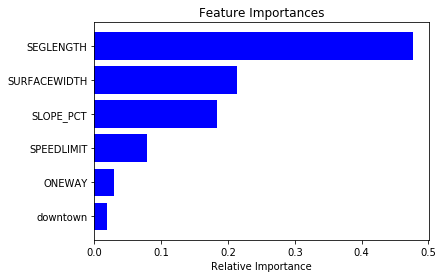

In [604]:
features=X_train.columns
importances = regr.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [507]:
# Let's establish a baseline for Random Forest using the mean value for the target

In [517]:
y_base = np.ones(886)*y.mean()

In [556]:
regbase = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=10)
regbase.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [557]:
regbase.score(X_train, y_base)

-1.0987456417019032e+31

In [558]:
mean_squared_error(y_base, regbase.predict(X_train))

2.166893703801512

In [559]:
mean_squared_error(y_test, regbase.predict(X_test))

9.413915611336824

Text(0.5, 0, 'Relative Importance')

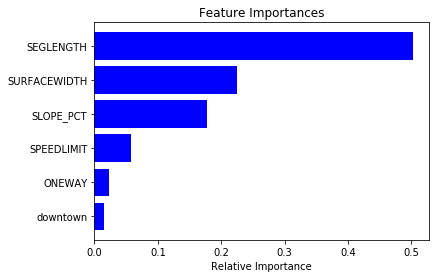

In [544]:
features=X_train.columns
importances = regbase.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [614]:
(reg['rate']*10**6).mean()

2.2811014333981823

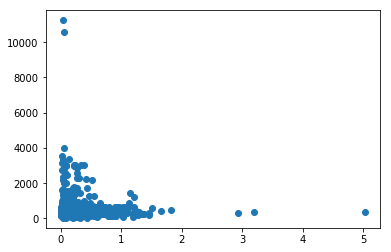

In [623]:
plt.scatter(y, X['SEGLENGTH'])

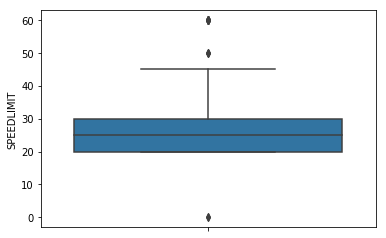

In [818]:
sns.boxplot(reg['SPEEDLIMIT'], orient='v')

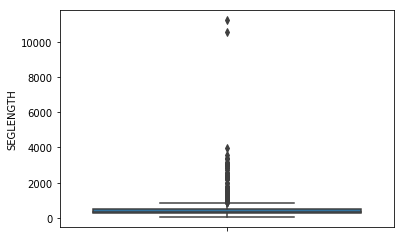

In [827]:
ax = sns.boxplot(x='SEGLENGTH', data=reg, orient='v')
#ax = sns.swarmplot(x="day", y="total_bill", data=tips, color=".25")

# Now let's standardize the features

In [964]:
scaler = StandardScaler()
print(scaler.fit(X))
print(scaler.mean_)


StandardScaler(copy=True, with_mean=True, with_std=True)
[26.1526833  36.19123205  3.4345193   0.2101285   0.23356009]


/Users/gulomjon/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [965]:
X_scaled = scaler.transform(X)

/Users/gulomjon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [966]:
y_sc = reg['rate'].fillna(reg['rate'].mean())

In [967]:
scaler.fit(y_sc.values.reshape(-1,1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [968]:
y_scaled = scaler.transform(y_sc.values.reshape(-1,1))

In [969]:
X_train_scale, X_test_scale, y_train_scale, y_test_scale = train_test_split(X_scaled, y_scaled, test_size=0.33, random_state=42)



In [945]:
linreg = LinearRegression().fit(X_train_scale, y_train_scale)

In [946]:
linreg.score(X_train_scale, y_train_scale)

0.0258706946776458

In [947]:
mean_squared_error(y_train_scale, linreg.predict(X_train_scale))

0.9130220335008673

In [948]:
linreg.score(X_test_scale, y_test_scale)

0.03673221981666197

In [949]:
y_scaled.min()

-0.7635497778873782

(array([341., 269., 200., 126., 102.,  84.,  52.,  35.,  23.,  10.,  13.,
         10.,  10.,   6.,   8.,   4.,   5.,   6.,   3.,   3.,   3.,   2.,
          0.,   3.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.]),
 array([-0.76354978, -0.54701462, -0.33047945, -0.11394429,  0.10259087,
         0.31912603,  0.53566119,  0.75219635,  0.96873151,  1.18526668,
         1.40180184,  1.618337  ,  1.83487216,  2.05140732,  2.26794248,
         2.48447764,  2.70101281,  2.91754797,  3.13408313,  3.35061829,
         3.56715345,  3.78368861,  4.00022378,  4.21675894,  4.4332941 ,
         4.64982926,  4.86636442,  5.08289958,  5.29943474,  5.51596991,
         5.73250

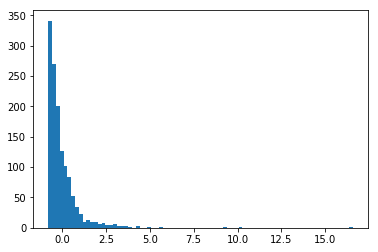

In [870]:
plt.hist(y_scaled, bins = 80)

In [950]:
linreg.coef_

array([[-0.04660999, -0.03531981,  0.03635464, -0.08849021, -0.07500535]])

In [951]:
ols = sm.OLS(y_train_scale, sm.add_constant(X_train_scale)).fit()

In [952]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     4.674
Date:                Fri, 05 Apr 2019   Prob (F-statistic):           0.000322
Time:                        11:36:19   Log-Likelihood:                -1216.9
No. Observations:                 886   AIC:                             2446.
Df Residuals:                     880   BIC:                             2474.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0309      0.032     -0.960      0.338      -0.094       0.032
x1            -0.0466      0.034     -1.387      0.166      -0.113       0.019
x2            -0.0353      0.032     -1.100      0.271      -0.098       0.028
x3             0.0364      0.032      1.122      0.262      -0.027       0.100
x4            -0.0885      0.037     -2.360      0.018      -0.162      -0.015
x5            -0.0750      0.037     -2.020      0.044      -0.148      -0.002
==============================================================================
Omnibus:                     1221.758   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           411138.906
Skew:                           7.244   Prob(JB):                         0.00
Kurtosis:                     107.533   Cond. No.                         1.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [874]:
# Random Forest for scaled data

In [970]:
rf_scaled = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=500)
rf_scaled.fit(X_train_scale, y_train_scale)

/Users/gulomjon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [971]:
rf_scaled.score(X_train_scale, y_train_scale)

0.1413451948522838

In [955]:
mean_squared_error(y_train_scale, rf_scaled.predict(X_train_scale))

0.8047912653770651

In [956]:
mean_squared_error(y_test_scale, rf_scaled.predict(X_test_scale))

1.1048119643890717

Text(0.5, 0, 'Relative Importance')

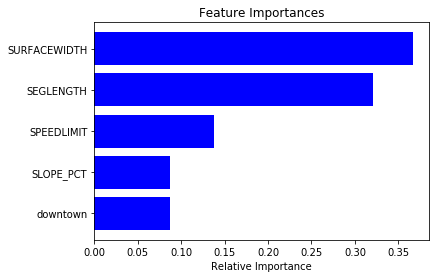

In [957]:
features=X_train.columns
importances = rf_scaled.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

,SPEEDLIMIT,SURFACEWIDTH,SLOPE_PCT,downtown,ONEWAY
0,30.0,20.0,0.0,0,1
1,30.0,33.0,0.0,0,1
2,30.0,25.0,0.0,0,1
3,30.0,55.0,1.0,0,1
4,35.0,77.0,0.0,0,0
5,35.0,55.0,10.0,0,0
6,35.0,48.0,3.0,0,0
7,30.0,42.0,0.0,0,0
8,35.0,44.0,1.0,0,1
9,35.0,44.0,1.0,0,1


In [697]:
# Lasso

In [800]:
clf = Lasso(alpha=0.01, max_iter=100)
clf.fit(X_train_scale, y_train_scale)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [801]:
clf.score(X_train_scale, y_train_scale)

0.02714571185324144

In [756]:
acc.columns

Index(['OBJECTID', 'ADDRTYPE', 'LOCATION', 'SEVERITYCODE', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INJURIES', 'SERIOUSINJURIES', 'FATALITIES', 'INCDATE', 'INCDTTM',
       'JUNCTIONTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'HITPARKEDCAR', 'geometry', 'datetime', 'time', 'year', 'month', 'day',
       'dayofweek', 'hour', 'FIRST_STNAME_ORD', 'AWDT_ROUND', 'DOWNTOWN',
       'SEGID'],
      dtype='object')

In [769]:
acc.groupby('year')['FATALITIES'].sum()

year
2003     0
2004    30
2005    29
2006    41
2007    14
2008    20
2009    24
2010    18
2011    11
2012    21
2013    22
2014    17
2015    21
2016    26
2017    19
2018    14
2019     4
Name: FATALITIES, dtype: int64

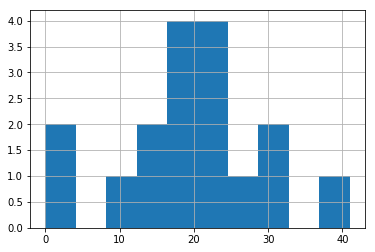

In [770]:
acc.groupby('year')['FATALITIES'].sum().hist()

In [783]:
y_counts = count16.iloc[:1323, :].values

In [787]:
X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(X, y_counts, test_size=0.33, random_state=42)


In [788]:
regcount = LinearRegression().fit(X_train_count, y_train_count)

In [789]:
regcount.score(X_train_count, y_train_count)

0.01676963649729335

In [790]:
regcount.score(X_test_count, y_test_count)

-0.027101137404385914

In [792]:
mean_squared_error(y_train_count, regcount.predict(X_train_count))

69.5422677477556

In [828]:
# RUN A REGRESSION ONLOY ON DOWNTOWN

In [831]:
regdowntown = LinearRegression().fit(X_train['downtown'].values.reshape(-1,1), y_train)

In [833]:
regdowntown.score(X_train['downtown'].values.reshape(-1,1), y_train)

0.014275257052717483

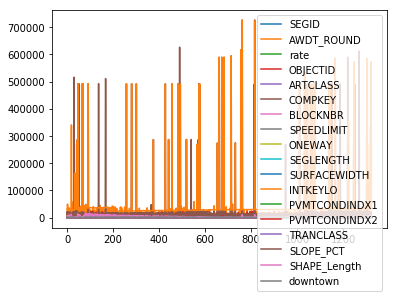

In [936]:
final_train.plot()